<a href="https://colab.research.google.com/github/LS10432/PDDS-PYD-0825-06Oct2025B/blob/main/Project/A7/A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the local path and the URL for the covid dataset
local_path = '/content/owid-covid-data.csv'
covid_url = 'https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv'

try:
    # Try to read the Titanic dataset from the local path
    df = pd.read_csv(local_path)
    print(f"Successfully loaded data from {local_path}")
    print("\n")
except FileNotFoundError:
    # If the local file is not found, read the dataset from the URL
    df = pd.read_csv(covid_url)
    print(f"Local file not found. Loading data from {covid_url}")
    print("\n")

print(f"Total number of columns: {df.shape[1]}")
print(f"Total number of rows: {df.shape[0]}")

# Identify and count missing values in each column
print(df.isnull().sum())

# Display columns with missing values and count how many columns have no missing values
missing_cols = df.isnull().sum() != 0
print(f"Number of columns with no missing values: {len(missing_cols) - missing_cols.sum()}")
print(f"Number of columns with missing values: {missing_cols.sum()}")

missing_values_percentage = df.isnull().mean() * 100
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index.tolist()

print("Columns with more than 90% missing values:")
print(columns_to_drop)

# Print number of columns to be dropped
print(f"Number of columns to be dropped: {len(columns_to_drop)}")
print("Column Names to be dropped:")
print(columns_to_drop)

# Remove columns with more than 90% missing values
df = df.drop(columns=columns_to_drop)

# Print number of columns remaining
print("\n")
print(f"Number of columns after removal: {df.shape[1]}")

# Convert the 'date' column from object type to datetime type
df['date'] = pd.to_datetime(df['date'])

# Print the number of missing values per column before imputation
print("Number of missing values per column before imputation:")
print(df.isnull().sum())

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print (f"Number of columns with numerical value :{len(numerical_cols)}")

# Impute missing values in numerical columns using the mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print (f"Number of columns with non-numerical value :{len(categorical_cols)}")

# Impute missing values in categorical columns using the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # mode() can return multiple values, take the first
        df[col] = df[col].fillna(mode_val)

# Print the number of remaining missing values per column
print("\nNumber of remaining missing values per column after imputation:")
print(df.isnull().sum())

# Get the number of rows before removing duplicates
rows_before = df.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Count the number of unique duplicate rows
unique_duplicate_rows = df[df.duplicated()].shape[0]
print(f"Number of unique duplicate rows: {unique_duplicate_rows}")

# Remove duplicate rows
df = df.drop_duplicates()

# Get the number of rows after removing duplicates
rows_after = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Get unique countries from the 'location' column
unique_countries = df['location'].unique()

# Count the number of unique countries
num_unique_countries = len(unique_countries)

# Print the total count of unique countries
print(f"Total number of unique countries: {num_unique_countries}")

# Display the list of unique countries
print("\nList of unique countries:")
print(unique_countries)

Local file not found. Loading data from https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv


Total number of columns: 67
Total number of rows: 358838
iso_code                                        0
continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 67, dtype: int64
Number of columns with no missing values: 4
Number of columns with missing values: 63
Columns with more than 90% missing values:
['weekly_icu_admissions', 'weekly_

# Activity 7: Additional Insights
Additional Insights Extracting additional insights, examining the influence of external factors, and evaluating regional disparities for a holistic understanding of the COVID-19 landscape.

## Visualize the fatality rate over time
1. Visualize the fatality rate (total deaths / total cases) over time globally.

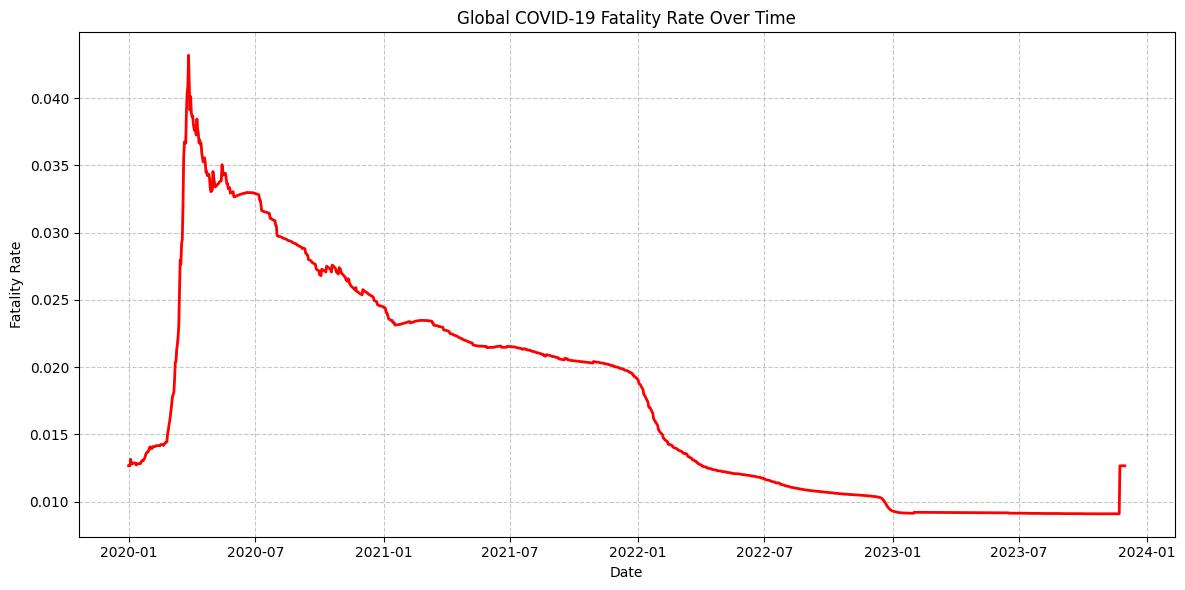

In [6]:
# 7.1. Visualize the fatality rate (total deaths / total cases) over time globally.
daily_global = df.groupby('date')[['total_cases', 'total_deaths']].sum().reset_index()
daily_global['fatality_rate'] = daily_global['total_deaths'] / daily_global['total_cases']

# 3️⃣ Plot fatality rate over time
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_global, x='date', y='fatality_rate', color='red', linewidth=2)

plt.title('Global COVID-19 Fatality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fatality Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Explore positivity rate
2. Explore positivity rate (total_cases/ total tests) verses total tests conducted to analyse testing effectiveness use x axis as logarithmic scale for better visualization.

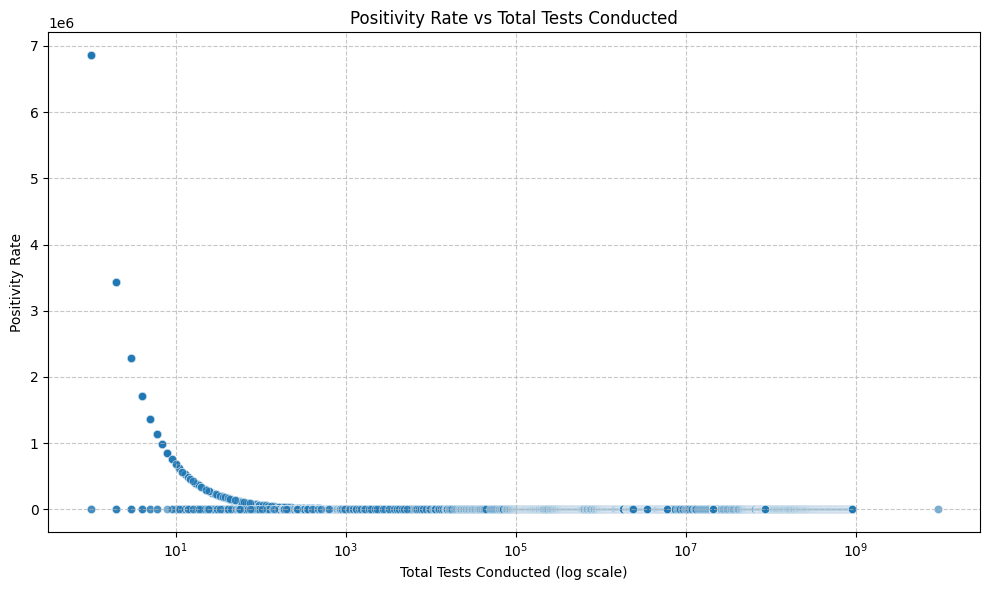

In [7]:
# 7.2. """Explore the positivity rate (total_cases/ total tests) versus total tests conducted to analyse testing effectiveness using the x-axis as the logarithmic
df['positivity_rate'] = df['total_cases'] / df['total_tests']

# 3️⃣ Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_tests', y='positivity_rate', alpha=0.6)

# 4️⃣ Set x-axis to logarithmic scale
plt.xscale('log')

# 5️⃣ Add titles and labels
plt.title('Positivity Rate vs Total Tests Conducted')
plt.xlabel('Total Tests Conducted (log scale)')
plt.ylabel('Positivity Rate')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Analyze fatality rate with smoking
3. Analyze fatality rate and its relationship with smoking (Use male_smokers and female_smokers columns)

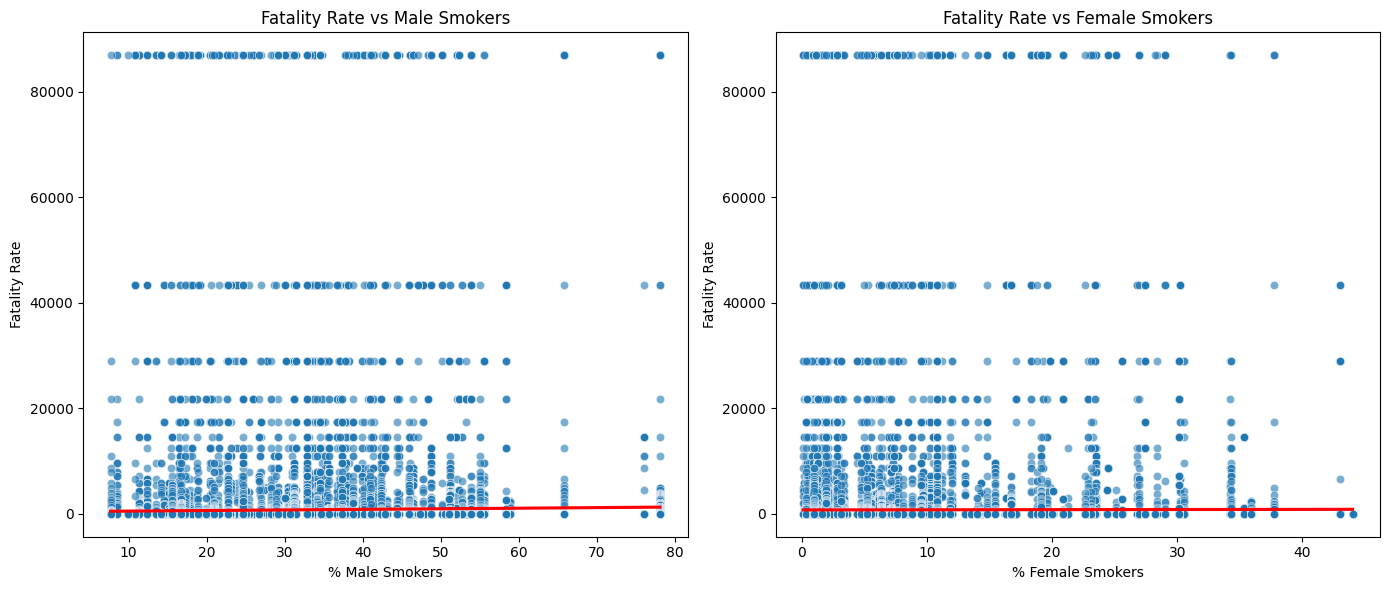

In [8]:
# 1️⃣ Remove rows with missing values in relevant columns
df_analysis = df.dropna(subset=['total_cases', 'total_deaths', 'male_smokers', 'female_smokers'])

# 2️⃣ Calculate fatality rate
df_analysis['fatality_rate'] = df_analysis['total_deaths'] / df_analysis['total_cases']

# 3️⃣ Create scatter plots
plt.figure(figsize=(14,6))

# Male smokers
plt.subplot(1,2,1)
sns.scatterplot(data=df_analysis, x='male_smokers', y='fatality_rate', alpha=0.6)
sns.regplot(data=df_analysis, x='male_smokers', y='fatality_rate', scatter=False, color='red')
plt.title('Fatality Rate vs Male Smokers')
plt.xlabel('% Male Smokers')
plt.ylabel('Fatality Rate')

# Female smokers
plt.subplot(1,2,2)
sns.scatterplot(data=df_analysis, x='female_smokers', y='fatality_rate', alpha=0.6)
sns.regplot(data=df_analysis, x='female_smokers', y='fatality_rate', scatter=False, color='red')
plt.title('Fatality Rate vs Female Smokers')
plt.xlabel('% Female Smokers')
plt.ylabel('Fatality Rate')

plt.tight_layout()
plt.show()

## Create a heatmap
4. Create a heatmap to analyze the relationship between hospital beds per thousand and fatality rate.

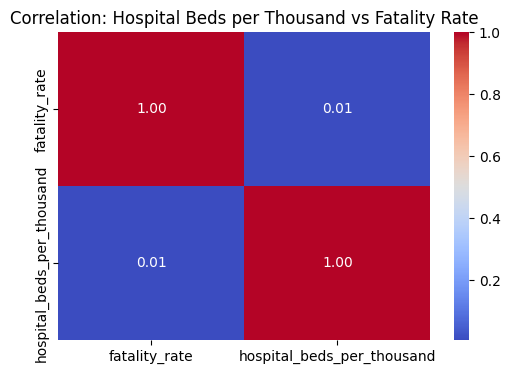

In [9]:
df_analysis = df.dropna(subset=['total_cases', 'total_deaths', 'hospital_beds_per_thousand'])

# 2️⃣ Calculate fatality rate
df_analysis['fatality_rate'] = df_analysis['total_deaths'] / df_analysis['total_cases']

# 3️⃣ Create a correlation matrix
corr_matrix = df_analysis[['fatality_rate','hospital_beds_per_thousand']].corr()

# 4️⃣ Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Hospital Beds per Thousand vs Fatality Rate')
plt.show()